In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import auc

# Results

#### Comparison

In [2]:
# 
tech_nm = ['baseline 190 (100)', 'fabnet_corr 190 (100)']

result_bs_fldr = '/data/home/shruti/voxceleb/svm_model'
folders = [f'{result_bs_fldr}/aus_corr_100', 
           f'{result_bs_fldr}/fabnet_corr_100_190']

pois = [ 'bo', 'bs', 'ew', 'hc', 'dt', 'jb', 'cb', 'pb', 'kh', 'br']
fakes = ['FF_orig', 'imposter', 'faceswap']

# read all the directories from the technique folders

res_dir = {}
for f in folders:
    res_dir[f] = [os.path.join(f, x) for x in os.listdir(f) if os.path.isdir(os.path.join(f, x))]
    
results = np.zeros((len(folders), len(pois), len(fakes)))

for fk in range(len(fakes)):
    
    for t in range(len(folders)):
        
        for poi in range(len(pois)):
            
            # go to the poi result folder
            cur_dirs = res_dir[folders[t]]
            cur_fldr = [x for x in cur_dirs if '{}'.format(pois[poi]) in x and os.path.isdir(x)]
            assert len(cur_fldr) == 1, 'poi folder should be only one {} {}'.format(cur_dirs, pois[poi])
            cur_fldr = cur_fldr[0]
            
            # read the poi, fake result file
            cur_file = [x for x in os.listdir(cur_fldr) if x.endswith('_roc_data.csv') 
                         and fakes[fk] in x and x[:3] != 'fv_']
            
            if len(cur_file) == 0:
                #print('not found {} {} {}'.format(folders[t], pois[poi], fakes[fk]))
                results[t, poi, fk] = np.nan
                continue
            
            #compute AUC
            assert len(cur_file) == 1, 'result file should be only one'
            cur_file = cur_file[0]
            df = pd.read_csv(os.path.join(cur_fldr, cur_file))
            results[t, poi, fk] = auc(np.array(df['fpr']), np.array(df['tpr']))            

In [15]:
results_new = np.zeros((6, len(pois), len(fakes)))
results_new[:2, :, :] = results.copy()

results_new[2, :, :] = np.array([[0.998887, 0.999782, 0.999997, 0.997818, 0.997565, 0.998896, 0.995333, 0.999440, 0.999859, 0.999792], 
                        [0.987500, 0.991261, 0.999998, 0.965626, 0.944162, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.977753, 0.940819, 0.972125, 0.950807, 0.907940, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]]).T


results_new[3, :, :] = np.array([[0.997330, 0.996908, 0.999587, 0.985219, 0.956708, 0.989160, 0.987560, 0.997784, 0.999263, 0.992382], 
                        [0.986966, 0.991085, 0.999999, 0.963949, 0.928125, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.976514, 0.941529, 0.972004, 0.946787, 0.854646, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]]).T

results_new[4, :, :] = np.array([[0.999982, 0.999999, 1.000000, 1.000000, 0.999995, 0.999968, 1.000000, 1.000000, 1.000000, 1.000000], 
                        [1.0, 0.999836, 1.0, 1.0, 0.988437, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [1.0, 0.951883, 0.999281, 0.816109, 0.945716, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]]).T

results_new[5, :, :] = np.array([[0.998150, 0.998473, 0.999890, 0.984534, 0.985797, 0.998666, 0.986213, 0.998880, 0.998726, 0.997264], 
                        [0.996179, 0.923695, 0.993201, 0.954138, 0.936693, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.991014, 0.789885, 0.947145, 0.951782, 0.902839, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]]).T



In [9]:
results_T = np.transpose(results_new, (0, 2, 1))
np.savetxt('results.csv', np.round(np.vstack(results_T)*100)/100, delimiter=',', fmt='%1.2f')

In [5]:
results_concat = np.hstack([results[0, :, :], results[1, :, :]])
results_df = pd.DataFrame(results_concat, columns=['baseline_diff', 'baseline_imposter', 'baseline_face_swap',
                                                  'fabnet corr diff', 'fabnet corr imposter', 'fabnet corr face_swap'], 
                         index=pois)

results_df = ((results_df * 100).round())/100
print(results_df)

    baseline_diff  baseline_imposter  baseline_face_swap  fabnet corr diff  \
bo           0.90               0.89                0.85              0.95   
bs           0.85               0.74                0.69              0.91   
ew           0.94               0.98                0.92              0.97   
hc           0.86               0.87                0.88              0.88   
dt           0.94               0.95                0.91              0.97   
jb           0.79                NaN                 NaN              0.83   
cb           0.98                NaN                 NaN              0.98   
pb           0.88                NaN                 NaN              0.94   
kh           0.84                NaN                 NaN              0.96   
br           0.92                NaN                 NaN              0.96   

    fabnet corr imposter  fabnet corr face_swap  
bo                  0.95                   0.97  
bs                  0.66                 

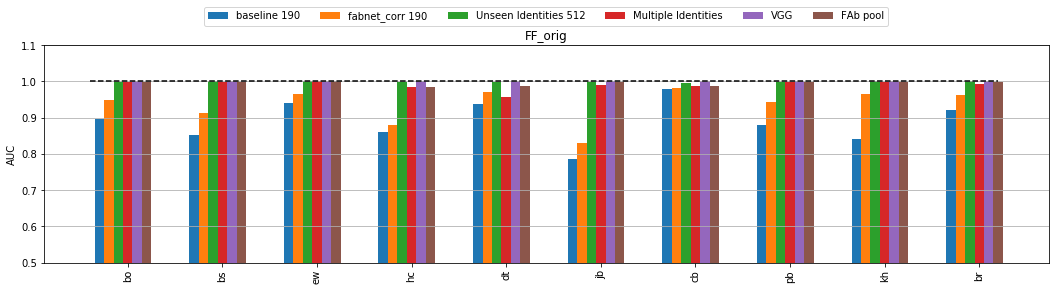

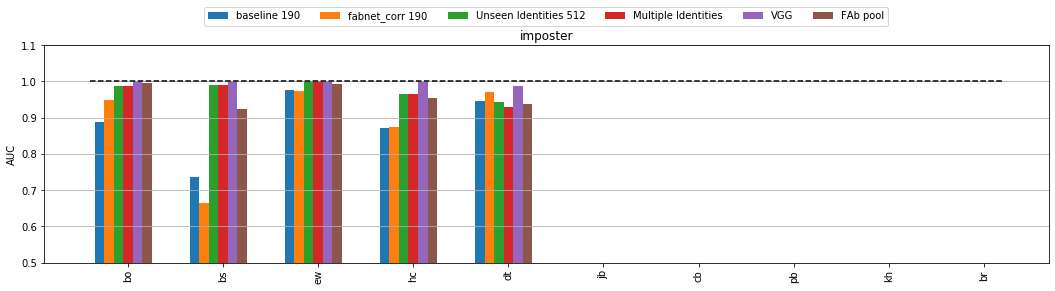

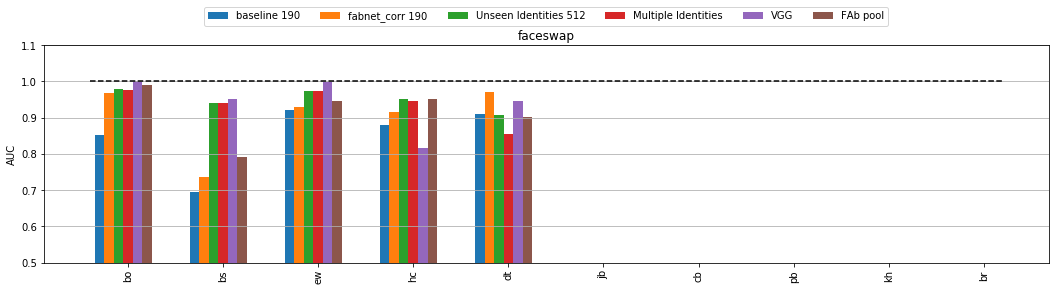

In [16]:
# visualize

# for each type of fake create a bar chart
# each bar graph number of pois are the groups
# each group has all the techniques
tech_nm = ['baseline 190', 'fabnet_corr 190', 'Unseen Identities 512', 'Multiple Identities', 'VGG', 'FAb pool']
br_w = 0.5/len(tech_nm)
for fk in range(len(fakes)):
    x_pos = np.arange(len(pois))
    fig, ax = plt.subplots(figsize=(18,4))
    plts = []
    
    for t in range(len(tech_nm)):
        
        p = ax.bar(x_pos, results_new[t, :, fk], br_w, bottom=0)
        plts = plts + [p]
        x_pos = x_pos+br_w

    ax.set_title(fakes[fk])
    ax.set_xticks(x_pos-br_w*len(tech_nm)/2)
    ax.set_xticklabels(pois, rotation=90)
    ax.set_ylim([0.5, 1.1])
    ax.set_ylabel('AUC')
    ax.plot([-0.1, 9.5], [1, 1], 'k--')
    ax.legend(plts, tech_nm, loc='upper center', 
              bbox_to_anchor=(0.5, 1.2), ncol=len(tech_nm), 
              fancybox=True, shadow=False)
    plt.grid(b=True, axis='y')
    plt.draw()
    plt.savefig(f'{fakes[fk]}.png')
    plt.show()

### tsne visualization

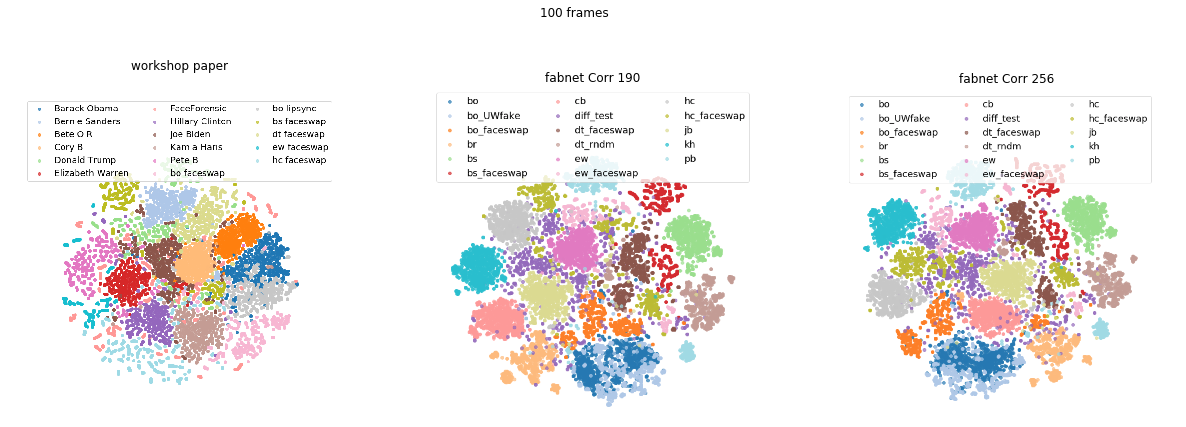

In [19]:
# 100 frames visualization
wp_100 = plt.imread('tsne_plots/only_cor_100.png') # CVPR workshop paper
aus_100 = plt.imread('tsne_plots/tsne_fabnet_corr190.png') # using 20 features directly
fabnet_100 = plt.imread('tsne_plots/tsne_fabnet_corr256.png') # using fabnet features
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
ax[0].imshow(wp_100); ax[0].set_title('workshop paper'); ax[0].axis('off')
ax[1].imshow(aus_100); ax[1].set_title('fabnet Corr 190'); ax[1].axis('off')
ax[2].imshow(fabnet_100); ax[2].set_title('fabnet Corr 256'); ax[2].axis('off')
plt.suptitle('100 frames')
plt.show()


# results with avg pool and vgg

In [4]:

# 
tech_nm = ['baseline 190 (100)']

result_bs_fldr = '/data/home/shruti/voxceleb/svm_model'
folders = [f'{result_bs_fldr}/aus_corr_100']

pois = [ 'bo', 'bs', 'ew', 'hc', 'dt', 'jb', 'cb', 'pb', 'kh', 'br']
fakes = ['FF_orig', 'imposter', 'faceswap']

# read all the directories from the technique folders

res_dir = {}
for f in folders:
    res_dir[f] = [os.path.join(f, x) for x in os.listdir(f) if os.path.isdir(os.path.join(f, x))]
    
results = np.zeros((len(folders), len(pois), len(fakes)))

for fk in range(len(fakes)):
    
    for t in range(len(folders)):
        
        for poi in range(len(pois)):
            
            # go to the poi result folder
            cur_dirs = res_dir[folders[t]]
            cur_fldr = [x for x in cur_dirs if '{}'.format(pois[poi]) in x and os.path.isdir(x)]
            assert len(cur_fldr) == 1, 'poi folder should be only one {} {}'.format(cur_dirs, pois[poi])
            cur_fldr = cur_fldr[0]
            
            # read the poi, fake result file
            cur_file = [x for x in os.listdir(cur_fldr) if x.endswith('_roc_data.csv') 
                         and fakes[fk] in x and x[:3] != 'fv_']
            
            if len(cur_file) == 0:
                #print('not found {} {} {}'.format(folders[t], pois[poi], fakes[fk]))
                results[t, poi, fk] = np.nan
                continue
            
            #compute AUC
            assert len(cur_file) == 1, 'result file should be only one'
            cur_file = cur_file[0]
            df = pd.read_csv(os.path.join(cur_fldr, cur_file))
            results[t, poi, fk] = auc(np.array(df['fpr']), np.array(df['tpr']))            


In [10]:
# total --> Workshop, fabnet Avg pool (unseen and multiple), VGG Avg Pool (unseen and multiple), 
# Combination FabNet Avg Pool (unseen and multiple), FabNet ML (unseen and multiple), 
# Combination VGG and FabNet ML (unseen and multiple),  Faceforensics with VGG and FabNet ML

results_oneId = np.zeros((11, len(pois), len(fakes)))
results_oneId[0, :, :] = results.copy()

# FabNet Avg Pool
results_oneId[1, :, :] = np.array([[0.998150, 0.998473, 0.999890, 0.984534, 0.985797, 0.998666, 0.986213, 0.998880, 0.998726, 0.997264], 
                        [0.996179, 0.923695, 0.993201, 0.954138, 0.936693, 0.981683, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.991014, 0.789885, 0.947145, 0.951782, 0.902839, 0.913927, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# VGG Avg Pool
results_oneId[2, :, :] = np.array([[0.999982, 0.999999, 1.000000, 1.000000, 0.999995, 0.999968, 1.000000, 1.000000, 1.000000, 1.000000], 
                        [1.000000, 0.999836, 1.000000, 1.000000, 0.988437, 1.0000, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [1.000000, 0.951883, 0.999281, 0.808109, 0.952760, 0.855550, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination VGG and FabNet Avg Pool
results_oneId[3, :, :] = np.array([[0.999821, 0.999999, 1.000000, 1.000000, 0.999999, 0.999736, 1.000000, 1.000000, 1.000000, 1.000000], 
                        [1.000000, 0.999801, 1.000000, 1.000000, 0.992606, 1.00, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [1.000000, 0.946775, 0.999243, 0.860251, 0.956773, 0.87, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# FabNet ML
results_oneId[4, :, :] = np.array([[0.999064, 0.999830, 0.999999, 0.997729, 0.997474, 0.998942, 0.995124, 0.999380, 0.999941, 0.999892], 
                        [0.987321, 0.991391, 0.999999, 0.965964, 0.941764, 0.990803, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.977352, 0.941310, 0.972004, 0.951271, 0.904177, 0.939082, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination VGG and FabNet ML
results_oneId[5, :, :] = np.array([[0.999923, 0.999995, 1.000000, 1.000000, 0.999999, 0.999993, 0.999988, 1.000000, 1.000000, 1.000000], 
                        [1.000000, 0.999682, 1.000000, 1.000000, 0.991047, 1.0000, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.998259, 0.951015, 0.990016, 0.935879, 0.950396, 0.909179, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination FabNet ML 25
results_oneId[6, :, :] = np.array([[0.998403, 0.999667, 0.999802, 0.989890, 0.995181, 0.996427, 0.992221, 0.996559, 0.998962, 0.997560], 
                        [0.979331, 0.966640, 0.994131, 0.936239, 0.921074, 0.955769, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.966009, 0.899309, 0.895860, 0.934392, 0.897069, 0.906092, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination FabNet ML 50
results_oneId[7, :, :] = np.array([[0.999313, 0.999781, 0.999926, 0.991337, 0.997286, 0.998120, 0.995113, 0.999038, 0.999295, 0.999098], 
                        [0.985813, 0.978569, 0.997656, 0.938873, 0.925981, 0.968680, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.975001, 0.912054, 0.875157, 0.930542, 0.893239, 0.919117, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination FabNet ML 75
results_oneId[8, :, :] = np.array([[0.999482, 0.999936, 0.999992, 0.998472, 0.995103, 0.998917, 0.995805, 0.999565, 0.999694, 0.999618], 
                        [0.995081, 0.983095, 0.999933, 0.960116, 0.906514, 0.975563, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.991742, 0.927762, 0.932460, 0.945769, 0.904610, 0.931479, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination ResNext3D
results_oneId[9, :, :] = np.array([[0.999024, 0.998557, 0.999898, 0.920314, 0.995239, 0.955498, 0.974150, 0.989054, 0.986182, 0.983067], 
                        [0.997066, 0.768972, 0.952645, 0.702731, 0.862001, 0.979046, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.994093, 0.819150, 0.869445, 0.655647, 0.856962, 0.974583, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# FAbNet ML Compression
results_oneId[10, :, :] = np.array([[0.999431, 0.999893, 1.000000, 0.996878, 0.996592, 0.994189, 0.996058, 0.999585, 0.999799, 0.999727], 
                        [0.986086, 0.985505, 1.000000, 0.962811, 0.908199, 0.907656, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.967419, 0.942941, 0.977959, 0.936881, 0.865963, 0.795053, np.NaN, np.NaN, np.NaN, np.NaN]]).T


results_mulId = np.zeros((11, len(pois), len(fakes)))
results_mulId[0, :, :] = results.copy()

# FabNet Avg Pool
results_mulId[1, :, :] = np.array([[0.984038, 0.951509, 0.997218, 0.974182, 0.87543, 0.986765, 0.972505, 0.996678, 0.994398, 0.944549], 
                        [0.991946, 0.899813, 0.988037, 0.957849, 0.898186, 0.958726, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.989782, 0.783573, 0.946844, 0.955010, 0.830428, 0.898001, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# VGG Avg Pool
results_mulId[2, :, :] = np.array([[0.999812, 0.999759, 0.999873, 0.997882, 0.99915, 0.998728, 0.999696, 0.999867, 0.999886, 0.999773], 
                        [1.000000, 1.000000, 1.000000, 1.000000, 0.988437, 1.000, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [1.000000, 0.951895, 0.999281, 0.816109, 0.952760, 0.855550, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination VGG and FabNet Avg Pool
results_mulId[3, :, :] = np.array([[0.999999, 0.999992, 1.000000, 0.999137, 0.999764, 0.999438, 0.999916, 0.999998, 1.000000, 0.999996], 
                        [1.000000, 1.000000, 1.000000, 1.000000, 0.992939, 1.000000, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [1.000000, 0.946792, 0.999250, 0.855923, 0.961099, 0.870201, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# FabNet ML
results_mulId[4, :, :] = np.array([[0.998014, 0.997096, 0.999626, 0.984821, 0.956433, 0.989314, 0.987001, 0.997677, 0.999247, 0.992683], 
                        [0.991034, 0.986648, 1.000000, 0.964196, 0.929624, 0.952326, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.983604, 0.943371, 0.968900, 0.948411, 0.867233, 0.923962, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination VGG and FabNet ML
results_mulId[5, :, :] = np.array([[0.999588, 0.999423, 0.999920, 0.998207, 0.998108, 0.998914, 0.997745, 0.999719, 0.999858, 0.998446], 
                        [0.999678, 0.999749, 1.000000, 0.999989, 0.991648, 0.999894, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.991797, 0.944570, 0.985252, 0.949512, 0.944386, 0.938087, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination FabNet ML 25
results_mulId[6, :, :] = np.array([[0.984532, 0.978720, 0.994279, 0.967558, 0.914735, 0.971000, 0.971458, 0.984599, 0.998363, 0.971080], 
                        [0.975594, 0.955275, 0.992694, 0.942429, 0.897196, 0.930010, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.960382, 0.896341, 0.895781, 0.937503, 0.861365, 0.879257, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination FabNet ML 50
results_mulId[7, :, :] = np.array([[0.987017, 0.994792, 0.997553, 0.971117, 0.952654, 0.973686, 0.980177, 0.993304, 0.999206, 0.984486], 
                        [0.982583, 0.977931, 0.996339, 0.941416, 0.924141, 0.929381, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.969062, 0.912786, 0.875142, 0.933649, 0.890789, 0.901751, np.NaN, np.NaN, np.NaN, np.NaN]]).T


# Combination FabNet ML 75
results_mulId[8, :, :] = np.array([[0.996683, 0.996334, 0.999371, 0.987355, 0.942936, 0.985480, 0.986782, 0.995372, 0.999615, 0.990222], 
                        [0.994739, 0.982721, 0.999861, 0.964816, 0.907118, 0.954020, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.991609, 0.928068, 0.932460, 0.953317, 0.893014, 0.926223, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# Combination ResNext3D
results_mulId[9, :, :] = np.array([[0.854421, 0.797431, 0.877791, 0.802580, 0.875020, 0.702667, 0.839779, 0.828882, 0.985448, 0.652265], 
                        [0.985826, 0.770979, 0.950640, 0.722551, 0.859058, 0.847310, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.986056, 0.823398, 0.868514, 0.672857, 0.855042, 0.745045, np.NaN, np.NaN, np.NaN, np.NaN]]).T

# FAbNet ML Compression
results_mulId[10, :, :] = np.array([[0.997765, 0.996353, 0.999887, 0.981841, 0.949735, 0.966556, 0.990169, 0.998273, 0.999031, 0.994553], 
                        [0.985780, 0.983384, 1.000000, 0.958903, 0.893442, 0.821607, np.NaN, np.NaN, np.NaN, np.NaN], 
                        [0.966155, 0.942076, 0.977959, 0.931193, 0.825756, 0.770905, np.NaN, np.NaN, np.NaN, np.NaN]]).T


In [12]:

nm = ['compression']#['FAb-Net ML 25', 'FAb-Net ML 50', 'FAb-Net ML 75']
c = 0
for i in [10]:#[6, 7, 8]:
    
    print(nm[c])
    c = c+1
    for x in range(10):
        
        if np.isnan(results_oneId[i, x, 0]):
            print('& - ', end=' ')
        else:
            print('& {0:.2f}'.format(results_oneId[i, x, 0]), end=' ')
            
        if np.isnan(results_mulId[i, x, 0]):
            print('/ - ', end=' ')
        else:
            print('/ {0:.2f}'.format(results_mulId[i, x, 0]), end=' ')
          
    print('& {0:.2f} / {0:.2f} \\\\'.format(np.nanmean(results_oneId[i, :, 0]), 
                                          np.nanmean(results_mulId[i, :, 0])) )
    
    for x in range(10):
        
        if np.isnan(results_oneId[i, x, 1]):
            print('& - ', end=' ')
        else:
            print('& {0:.2f}'.format(results_oneId[i, x, 1]), end=' ')
            
        if np.isnan(results_mulId[i, x, 1]):
            print('/ - ', end=' ')
        else:
            print('/ {0:.2f}'.format(results_mulId[i, x, 1]), end=' ')
            
    print('& {0:.2f} / {0:.2f} \\\\'.format(np.nanmean(results_oneId[i, :, 1]), 
                                          np.nanmean(results_mulId[i, :, 1])) )
    
    
    for x in range(10):
        
        if np.isnan(results_oneId[i, x, 2]):
            print('& - ', end=' ')
        else:
            print('& {0:.2f}'.format(results_oneId[i, x, 2]), end=' ')
            
        if np.isnan(results_mulId[i, x, 2]):
            print('/ - ', end=' ')
        else:
            print('/ {0:.2f}'.format(results_mulId[i, x, 2]), end=' ')
            
    print('& {0:.2f} / {0:.2f} \\\\'.format(np.nanmean(results_oneId[i, :, 2]), 
                                          np.nanmean(results_mulId[i, :, 2])) )
    

compression
& 1.00 / 1.00 & 1.00 / 1.00 & 1.00 / 1.00 & 1.00 / 0.98 & 1.00 / 0.95 & 0.99 / 0.97 & 1.00 / 0.99 & 1.00 / 1.00 & 1.00 / 1.00 & 1.00 / 0.99 & 1.00 / 1.00 \\
& 0.99 / 0.99 & 0.99 / 0.98 & 1.00 / 1.00 & 0.96 / 0.96 & 0.91 / 0.89 & 0.91 / 0.82 & -  / -  & -  / -  & -  / -  & -  / -  & 0.96 / 0.96 \\
& 0.97 / 0.97 & 0.94 / 0.94 & 0.98 / 0.98 & 0.94 / 0.93 & 0.87 / 0.83 & 0.80 / 0.77 & -  / -  & -  / -  & -  / -  & -  / -  & 0.91 / 0.91 \\


In [64]:
np.savetxt('results_oneID.csv', np.vstack(np.transpose(results_oneId, (0, 2, 1))), delimiter=',', fmt='%1.2f')
np.savetxt('results_mulID.csv', np.vstack(np.transpose(results_mulId, (0, 2, 1))), delimiter=',', fmt='%1.2f')


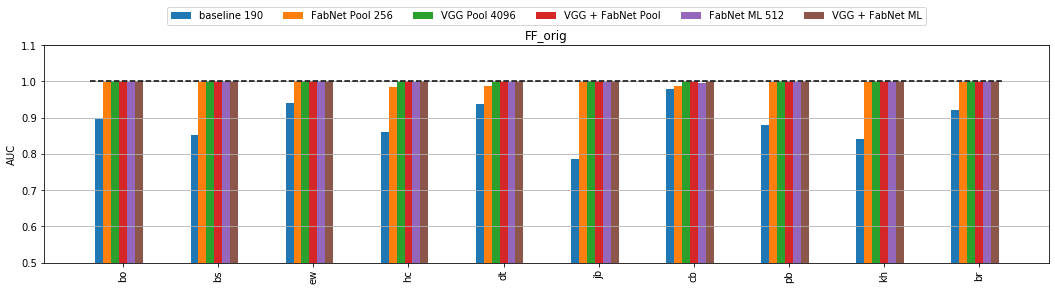

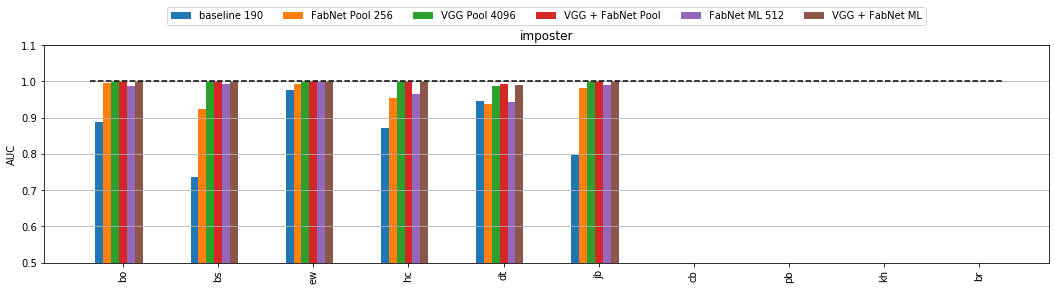

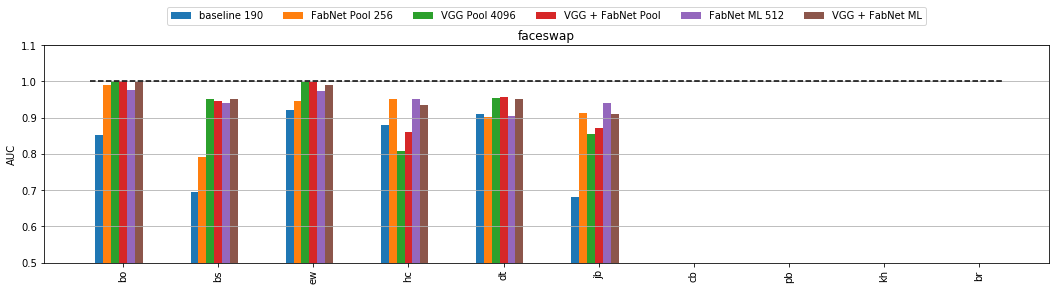

In [65]:
# visualize

# for each type of fake create a bar chart
# each bar graph number of pois are the groups
# each group has all the techniques
tech_nm = ['baseline 190', 'FabNet Pool 256', 'VGG Pool 4096', 'VGG + FabNet Pool', 'FabNet ML 512', 'VGG + FabNet ML']
br_w = 0.5/len(tech_nm)
for fk in range(len(fakes)):
    x_pos = np.arange(len(pois))
    fig, ax = plt.subplots(figsize=(18,4))
    plts = []
    
    for t in range(len(tech_nm)):
        
        p = ax.bar(x_pos, results_oneId[t, :, fk], br_w, bottom=0)
        plts = plts + [p]
        x_pos = x_pos+br_w

    ax.set_title(fakes[fk])
    ax.set_xticks(x_pos-br_w*len(tech_nm)/2)
    ax.set_xticklabels(pois, rotation=90)
    ax.set_ylim([0.5, 1.1])
    ax.set_ylabel('AUC')
    ax.plot([-0.1, 9.5], [1, 1], 'k--')
    ax.legend(plts, tech_nm, loc='upper center', 
              bbox_to_anchor=(0.5, 1.2), ncol=len(tech_nm), 
              fancybox=True, shadow=False)
    plt.grid(b=True, axis='y')
    plt.draw()
    plt.savefig(f'one_id_{fakes[fk]}.png')
    plt.show()

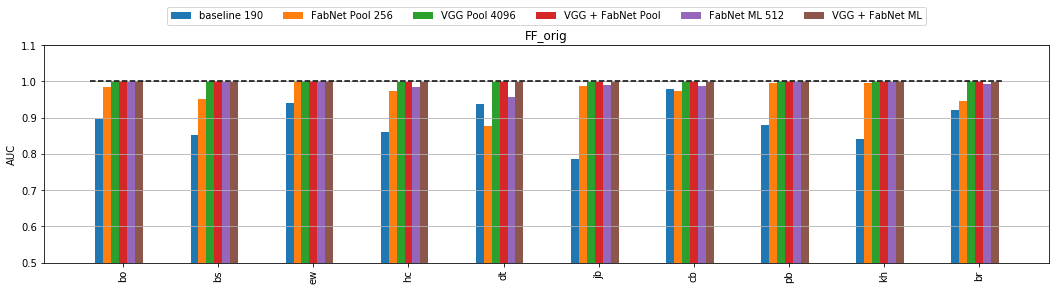

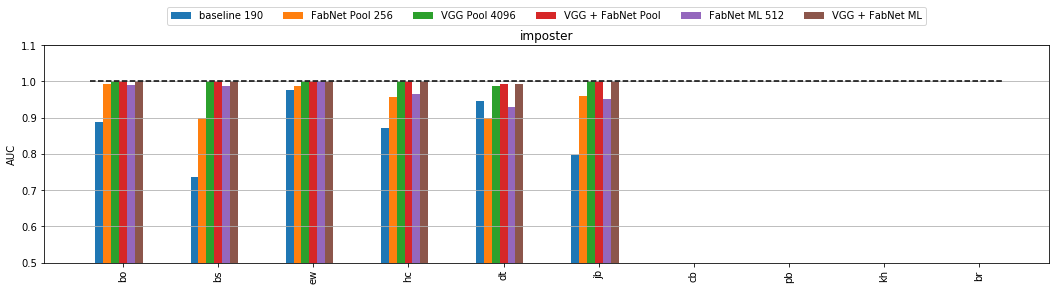

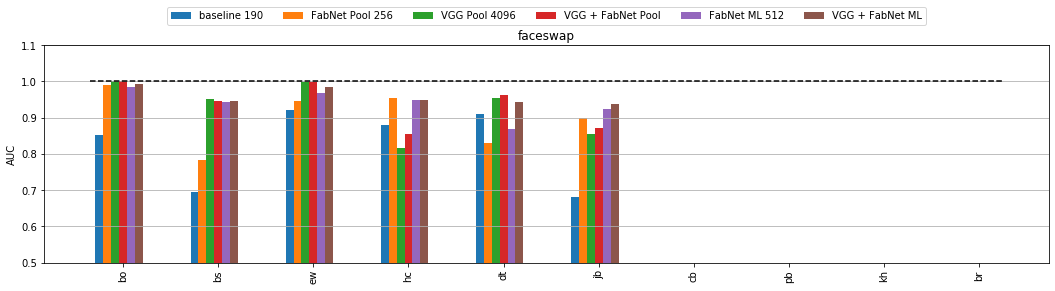

In [66]:

# for each type of fake create a bar chart
# each bar graph number of pois are the groups
# each group has all the techniques
tech_nm = ['baseline 190',  'FabNet Pool 256', 'VGG Pool 4096', 'VGG + FabNet Pool', 'FabNet ML 512', 'VGG + FabNet ML']
br_w = 0.5/len(tech_nm)
for fk in range(len(fakes)):
    x_pos = np.arange(len(pois))
    fig, ax = plt.subplots(figsize=(18,4))
    plts = []
    
    for t in range(len(tech_nm)):
        
        p = ax.bar(x_pos, results_mulId[t, :, fk], br_w, bottom=0)
        plts = plts + [p]
        x_pos = x_pos+br_w

    ax.set_title(fakes[fk])
    ax.set_xticks(x_pos-br_w*len(tech_nm)/2)
    ax.set_xticklabels(pois, rotation=90)
    ax.set_ylim([0.5, 1.1])
    ax.set_ylabel('AUC')
    ax.plot([-0.1, 9.5], [1, 1], 'k--')
    ax.legend(plts, tech_nm, loc='upper center', 
              bbox_to_anchor=(0.5, 1.2), ncol=len(tech_nm), 
              fancybox=True, shadow=False)
    plt.grid(b=True, axis='y')
    plt.draw()
    plt.savefig(f'mul_id_{fakes[fk]}.png')
    plt.show()

In [ ]:
FF_orig acc: 0.36162079510703365
FF_Deepfakes acc: 0.7821614983113294
FF_FaceSwap acc: 0.771286750668194
FF_Face2Face acc: 0.8770847932725998
FF_NeuralTextures acc: 0.7239404352806414